In [ ]:
%matplotlib inline
!pip install geopandas
import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. l'elenco dei comuni che hanno un'area inferiore ai 10 kmq: visualizzare il numero, l'elenco e la mappa  con tutti i comuni colorati in verde (trasparente) e bordati di nero

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g")
comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [ ]:
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g")
regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


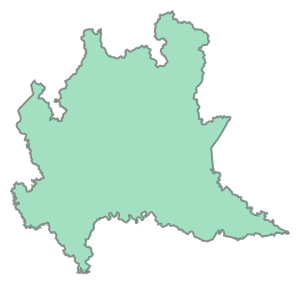

In [ ]:
regioniL = regioni.loc[regioni["DEN_REG"] == "Lombardia" , 'geometry'].squeeze()
regioniL

In [ ]:
comuniL =   comuni[comuni.intersects(regioniL)]
comuniL

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
327,1,1,2,0,2,2030,002030,Caresana,None,0,29287.627215,2.354141e+07,"POLYGON ((461981.696 5010959.782, 462037.915 5..."
355,1,1,2,0,2,2082,002082,Motta de' Conti,None,0,20149.303000,1.172523e+07,"POLYGON ((466866.212 5006033.267, 467107.411 5..."
360,1,1,2,0,2,2093,002093,Pezzana,None,0,24881.559799,1.697397e+07,"POLYGON ((462706.925 5013988.510, 462962.908 5..."
364,1,1,2,0,2,2104,002104,Prarolo,None,0,18486.877395,1.178579e+07,"POLYGON ((457715.979 5015952.244, 457965.977 5..."
388,1,1,2,0,2,2158,002158,Vercelli,None,1,54130.294396,7.977858e+07,"POLYGON ((453592.603 5024411.180, 453631.602 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,1,3,108,0,108,108051,108051,Busnago,None,0,11376.029586,5.834750e+06,"POLYGON ((535742.586 5052473.474, 535839.585 5..."
7742,1,3,108,0,108,108052,108052,Caponago,None,0,11874.711735,4.807794e+06,"POLYGON ((530927.622 5047008.514, 530890.358 5..."
7743,1,3,108,0,108,108053,108053,Cornate d'Adda,None,0,15414.910444,1.364665e+07,"POLYGON ((537678.573 5057235.438, 537951.570 5..."
7744,1,3,108,0,108,108054,108054,Lentate sul Seveso,None,0,17060.616570,1.431746e+07,"POLYGON ((508523.788 5059797.421, 509626.779 5..."


In [ ]:
comuniL["area"] = comuni.area / 10**6
comuniL

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry,area
327,1,1,2,0,2,2030,002030,Caresana,None,0,29287.627215,2.354141e+07,"POLYGON ((461981.696 5010959.782, 462037.915 5...",23.541411
355,1,1,2,0,2,2082,002082,Motta de' Conti,None,0,20149.303000,1.172523e+07,"POLYGON ((466866.212 5006033.267, 467107.411 5...",11.725229
360,1,1,2,0,2,2093,002093,Pezzana,None,0,24881.559799,1.697397e+07,"POLYGON ((462706.925 5013988.510, 462962.908 5...",16.973968
364,1,1,2,0,2,2104,002104,Prarolo,None,0,18486.877395,1.178579e+07,"POLYGON ((457715.979 5015952.244, 457965.977 5...",11.785791
388,1,1,2,0,2,2158,002158,Vercelli,None,1,54130.294396,7.977858e+07,"POLYGON ((453592.603 5024411.180, 453631.602 5...",79.778581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,1,3,108,0,108,108051,108051,Busnago,None,0,11376.029586,5.834750e+06,"POLYGON ((535742.586 5052473.474, 535839.585 5...",5.834750
7742,1,3,108,0,108,108052,108052,Caponago,None,0,11874.711735,4.807794e+06,"POLYGON ((530927.622 5047008.514, 530890.358 5...",4.807794
7743,1,3,108,0,108,108053,108053,Cornate d'Adda,None,0,15414.910444,1.364665e+07,"POLYGON ((537678.573 5057235.438, 537951.570 5...",13.646650
7744,1,3,108,0,108,108054,108054,Lentate sul Seveso,None,0,17060.616570,1.431746e+07,"POLYGON ((508523.788 5059797.421, 509626.779 5...",14.317455


In [ ]:
comuniMinori = comuniL[comuni["area"] < 10]
comuniMinori

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry,area
427,1,1,3,0,3,3062,003062,Dormelletto,None,0,11281.402686,7.144680e+06,"POLYGON ((467520.526 5066263.873, 467557.901 5...",7.144680
442,1,1,3,0,3,3091,003091,Marano Ticino,None,0,14517.515987,7.762734e+06,"POLYGON ((473628.521 5053491.974, 473701.044 5...",7.762734
444,1,1,3,0,3,3095,003095,Meina,None,0,16738.208521,7.458775e+06,"POLYGON ((465401.551 5071715.828, 465199.521 5...",7.458775
472,1,1,3,0,3,3144,003144,Terdobbiate,None,0,12721.520392,7.760354e+06,"POLYGON ((476372.150 5026656.666, 476653.648 5...",7.760354
1010,1,1,6,0,6,6023,006023,Bozzole,None,0,13013.248155,9.125740e+06,"POLYGON ((470685.477 4992822.919, 471271.348 4...",9.125740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738,1,3,108,0,108,108048,108048,Verano Brianza,None,0,9171.724083,3.667862e+06,"POLYGON ((517613.394 5060787.396, 518293.122 5...",3.667862
7739,1,3,108,0,108,108049,108049,Villasanta,None,0,9629.121636,4.645122e+06,"POLYGON ((523356.646 5052024.704, 523490.961 5...",4.645122
7741,1,3,108,0,108,108051,108051,Busnago,None,0,11376.029586,5.834750e+06,"POLYGON ((535742.586 5052473.474, 535839.585 5...",5.834750
7742,1,3,108,0,108,108052,108052,Caponago,None,0,11874.711735,4.807794e+06,"POLYGON ((530927.622 5047008.514, 530890.358 5...",4.807794


In [ ]:
comuniMinori.shape[0]-1

716

In [ ]:
!pip install contextily
import contextily

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


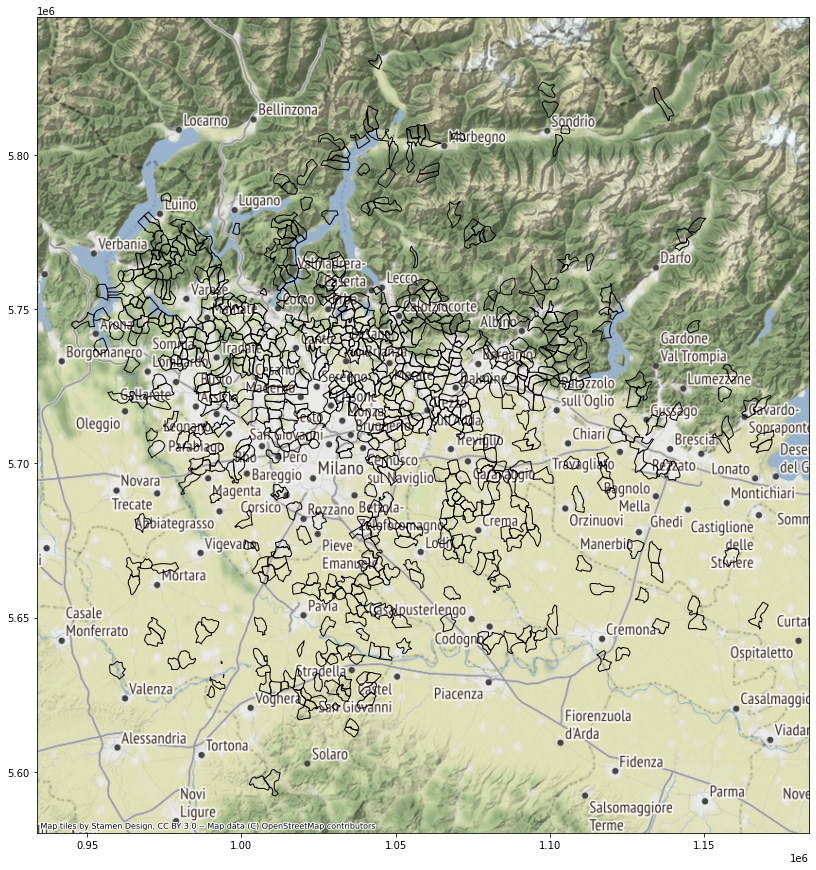

In [ ]:
ax = comuniMinori.to_crs(epsg= 3857).plot(figsize = (20,15),facecolor = "none", edgecolor = "k" )
contextily.add_basemap(ax)